In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import files

plt.style.use('seaborn')

# !pip install --upgrade xlrd

dataset = pd.read_excel('./drive/MyDrive/datasets/Pistachio_16_Features_Dataset.xls')

dataset

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,0.0052,0.0029,0.5545,0.9900,Siit_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,0.0051,0.0033,0.5639,0.8892,Siit_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,0.0047,0.0027,0.5702,0.9987,Siit_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,0.0046,0.0028,0.6066,0.9989,Siit_Pistachio


In [ ]:
dataset['Class'].value_counts().to_frame()

,Class
Kirmizi_Pistachio,1232
Siit_Pistachio,916


In [ ]:
X = dataset.iloc[:,0:16]

X_std = StandardScaler().fit_transform(X)

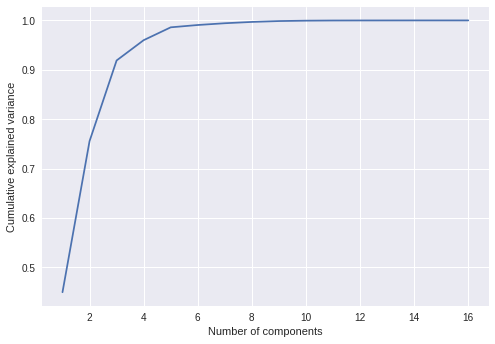

In [ ]:
pca = PCA()

components = pca.fit_transform(X_std)

plt.plot(range(1, 17), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
projections = []

df1 = pd.DataFrame(
    data = components[:,:3],
    columns = ['principal component 1', 'principal component 2', 'principal component 3']
)
df = pd.concat([df1, dataset['Class']], axis = 1)
projections.append(df)

In [ ]:
curves = []
db = {}
inertia = {}
for i in range(2, 17):
    km = KMeans(
        n_clusters=i, 
        n_init=20,
        random_state=30,
        init="k-means++")
    km.fit(X_std)
    db.update({i: davies_bouldin_score(X_std, km.labels_)})
    inertia.update({i: km.inertia_})
curves.append((db, inertia))

key = min(db, key=db.get) 
data = {
    'Best cluster' :[key],
    'Davies-Boulding index' :[db[key]]
}
pd.DataFrame(data)

,Best cluster,Davies-Boulding index
0,11,1.13184


In [ ]:
dataset = pd.read_excel('./drive/MyDrive/datasets/Pistachio_28_Features_Dataset.xls')

dataset

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,...,20.8474,20.8118,21.1175,-0.6994,-0.7071,-0.6963,2.8853,2.6599,2.6317,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,...,21.2621,22.5004,21.5821,-0.5567,-0.4968,-0.6597,2.3022,2.2664,2.5161,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,...,21.1262,20.0279,17.4401,-0.9072,-0.8790,-0.4470,3.3112,3.4306,3.0697,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,...,19.3274,19.1782,19.8930,-0.9473,-0.8404,-0.3153,3.4237,2.9606,3.0033,Siirt_Pistachio


In [ ]:
dataset['Class'].value_counts().to_frame()

,Class
Kirmizi_Pistachio,1232
Siirt_Pistachio,916


In [ ]:
X = dataset.iloc[:,0:28]

X_std = StandardScaler().fit_transform(X)

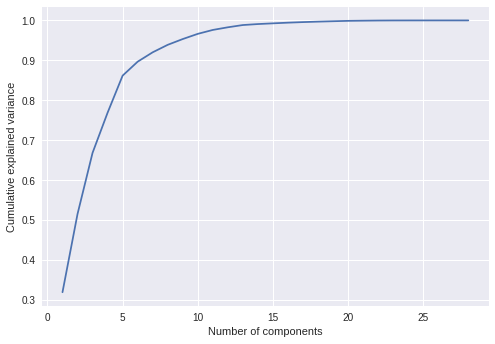

In [ ]:
pca = PCA()

components = pca.fit_transform(X_std)

plt.plot(range(1, 29), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
df1 = pd.DataFrame(
    data = components[:,:3],
    columns = ['principal component 1', 'principal component 2', 'principal component 3']
)
df = pd.concat([df1, dataset['Class']], axis = 1)
projections.append(df)

In [ ]:
db = {}
inertia = {}
for i in range(2, 29):
    km = KMeans(
        n_clusters=i, 
        n_init=20,
        random_state=30,
        init="k-means++")
    km.fit(X_std)
    db.update({i: davies_bouldin_score(X_std, km.labels_)})
    inertia.update({i: km.inertia_})

curves.append((db, inertia))

key = min(db, key=db.get) 
data = {
    'Best cluster' :[key],
    'Davies-Boulding index' :[db[key]]
}
pd.DataFrame(data)

,Best cluster,Davies-Boulding index
0,18,1.601393


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

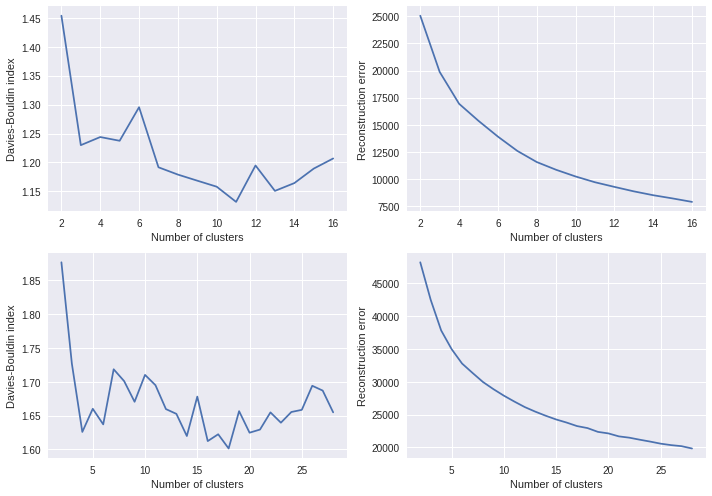

In [ ]:
fig = plt.figure(figsize=(10, 7))

i = 1
for db, inertia in curves:
  # DB curve
  ax1 = fig.add_subplot(2,2,2*i-1)
  ax1.plot(list(db.keys()), list(db.values()))
  ax1.set_xlabel("Number of clusters")
  ax1.set_ylabel("Davies-Bouldin index")
  
  # Inertia curve
  ax2 = fig.add_subplot(2,2,2*i)
  ax2.plot(list(inertia.keys()), list(inertia.values()))
  ax2.set_xlabel("Number of clusters")
  ax2.set_ylabel("Reconstruction error")
  i += 1

fig.tight_layout()
plt.show()
# plt.savefig("analysis.png")
# files.download("analysis.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

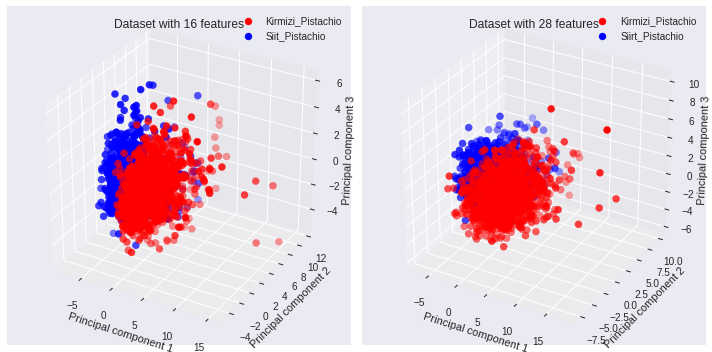

In [ ]:
fig = plt.figure(figsize=(10, 5))

j = 1
for df in projections:
  ax = fig.add_subplot(1,2,j, projection='3d') 
  ax.set_xlabel('Principal component 1')
  ax.set_ylabel('Principal component 2')
  ax.set_zlabel('Principal component 3')
  ax.set_title('Dataset with 16 features' if j == 1 else 'Dataset with 28 features')

  labels = ['Kirmizi_Pistachio', 'Siit_Pistachio' if j == 1 else 'Siirt_Pistachio']
  colors = ['r', 'b']
  for label, color in zip(labels, colors):
      i = df['Class'] == label
      ax.scatter(
          df.loc[i, 'principal component 1'], 
          df.loc[i, 'principal component 2'], 
          df.loc[i, 'principal component 3'], 
          c = color, 
          s = 50
      )
  ax.legend(labels)
  j += 1

fig.tight_layout()
plt.show()
# plt.savefig("projection.png")
# files.download("projection.png")